<a href="https://colab.research.google.com/github/gbomiye/3mtt-data-science/blob/master/computer%20vision_image%20processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Your observations from exploring the data.

The steps you took to clean, preprocess, and transform the data.

Justifications for each technique or decision you applied.

Reflections on the importance of preprocessing in real-world data analysis.

The data had a lot of incomplete profiles info across the columns and inconsonsistent data input.

I made sure the n/a data type were converted to string type to better accomodate and the mising data were filled in with the known figure directly above.

This was the chosen approach because the data would contain outliers if they mean is used in the case of financing type and categories. Then normalization was done on the invested amount to make the data range less obvious. Also for the text input they were classified into number or dummy values for use in carrying out the algorithm to be used.

Preprocessing is done to make sure the data is complete and made to conform to a standard that is fit for use porpooperly and also to view the data trends before carrying out the analysis and spot anomalies or outliers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys


In [3]:
import cv2 as cv

In [5]:
img = cv.imread('/lib/working/aaa.jpg', cv.IMREAD_GRAYSCALE)

In [6]:
img.shape

(1600, 1600)

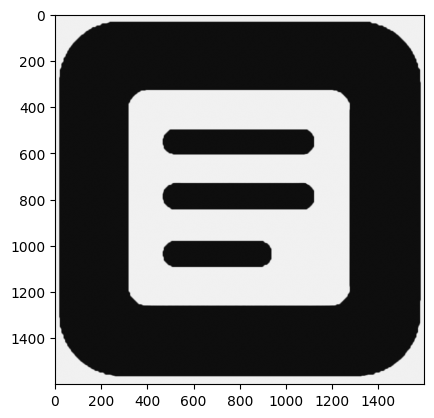

In [7]:
plt.imshow(img, cmap='gray')

In [24]:
edges = cv.Canny(img, 1, 200)
edges_2 = cv.Canny(img2, 1, 200)

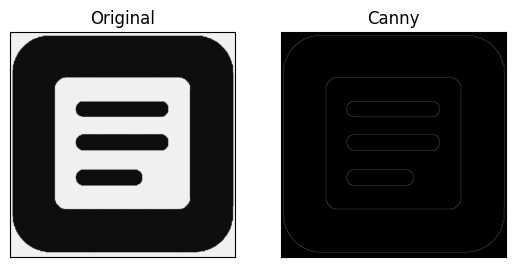

In [43]:
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Canny'), plt.xticks([]), plt.yticks([])
plt.show()

In [44]:
img2 = cv.imread('/lib/working/me.jpg', cv.IMREAD_GRAYSCALE)

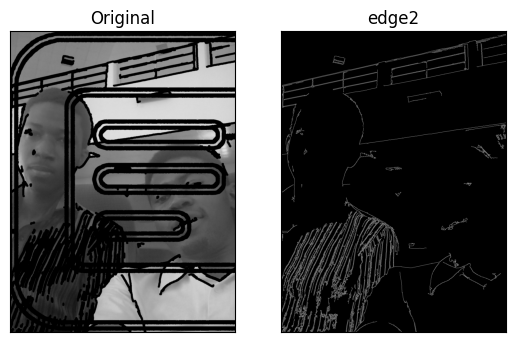

In [55]:
plt.subplot(121), plt.imshow(img2, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges_2, cmap='gray')
plt.title('edge2'), plt.xticks([]), plt.yticks([])
plt.show()

In [67]:
#contour processing

t_lower = 50
t_upper = 150
apertureSize = 3
L2gradient = False

# Resize the image slightly
# img2_resized = cv.resize(img2, (img2.shape[1] - 1, img2.shape[0] - 1))

# Convert img to grayscale for Canny
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


edged = cv.Canny(img_gray, t_lower, t_upper, apertureSize, L2gradient)

#find contour
contours, hierarchy = cv.findContours(edged, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
plt.imshow(edged)

# Create a color version of img2 to draw contours on
img_color = cv.imread('/lib/working/aaa.jpg')
cv.drawContours(img_color, contours, -1, (0,255,0), 10)
plt.imshow(img_color)

error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-15:Bad number of channels) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [66]:
img3 = cv.imread('/lib/working/Chrysanthemum.jpg') # Load as color image

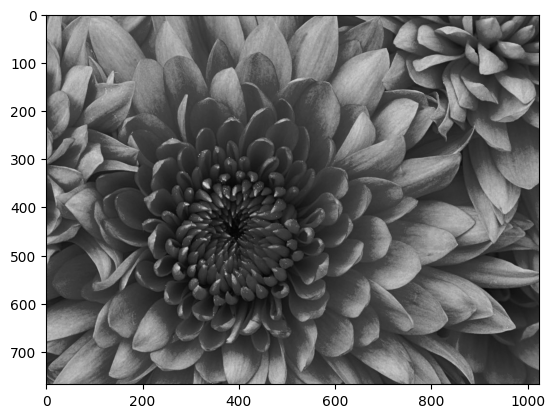

In [57]:
plt.imshow(img3, cmap='gray')

In [68]:
# If you still want a grayscale version of img3, you can convert it here
img3_gray = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)
display(img3_gray.shape)

(768, 1024)

In [69]:
# img3 is already loaded as color, so no conversion needed here
display(img3.shape)

(768, 1024, 3)

In [70]:
# Convert the color image to HSV color space
img3_hsv = cv.cvtColor(img3, cv.COLOR_BGR2HSV) # Use img3 (color)
display(img3_hsv.shape)

(768, 1024, 3)

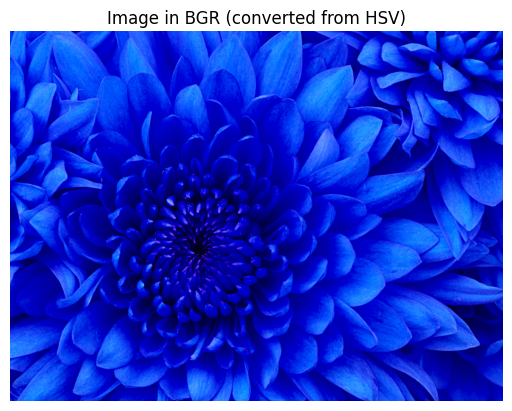

In [71]:
# Convert the HSV image back to BGR for display
img3_bgr = cv.cvtColor(img3_hsv, cv.COLOR_HSV2BGR)

# Display the BGR image
plt.imshow(img3_bgr)
plt.title('Image in BGR (converted from HSV)')
plt.axis('off') # Hide axes ticks and labels
plt.show()

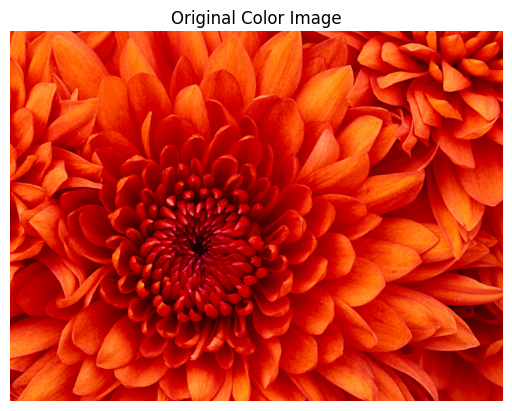

In [72]:
# Display the original color image (should be red)
plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB)) # Convert BGR to RGB for matplotlib display
plt.title('Original Color Image')
plt.axis('off')
plt.show()

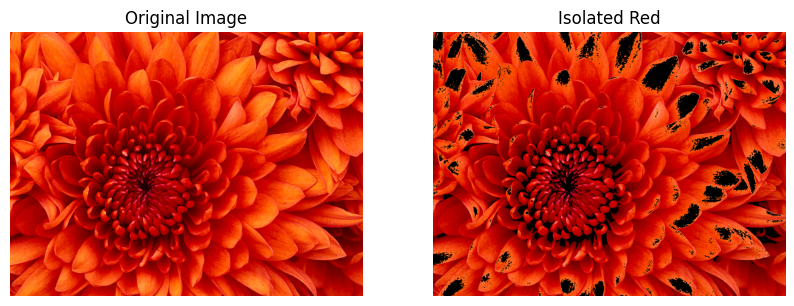

In [73]:
# Define the lower and upper bounds for the red color in HSV
# Red is at the beginning and end of the HSV hue spectrum (0-180 in OpenCV)
lower_red_1 = np.array([0, 100, 100])
upper_red_1 = np.array([10, 255, 255])

lower_red_2 = np.array([160, 100, 100])
upper_red_2 = np.array([180, 255, 255])

# Create masks for the two red ranges
mask1 = cv.inRange(img3_hsv, lower_red_1, upper_red_1)
mask2 = cv.inRange(img3_hsv, lower_red_2, upper_red_2)

# Combine the masks
red_mask = mask1 + mask2

# Use the mask to isolate the red color in the original image
red_isolated = cv.bitwise_and(img3, img3, mask=red_mask)

# Display the original image and the isolated red areas
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(red_isolated, cv.COLOR_BGR2RGB))
plt.title('Isolated Red')
plt.axis('off')

plt.show()

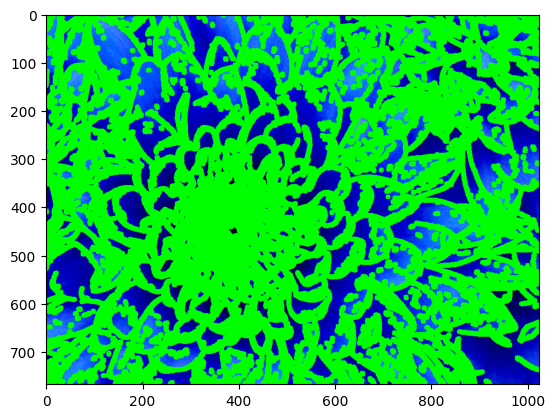

In [78]:
#contour processing

t_lower = 100
t_upper = 150
apertureSize = 3
L2gradient = False

# Resize the image slightly
# img2_resized = cv.resize(img2, (img2.shape[1] - 1, img2.shape[0] - 1))

# Convert img to grayscale for Canny
img_gray = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)


edged = cv.Canny(img3, t_lower, t_upper, apertureSize)


contours, hierarchy = cv.findContours(edged, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
plt.imshow(edged)

# Create a color version of img2 to draw contours on
img_color = cv.imread('/lib/working/Chrysanthemum.jpg')
cv.drawContours(img_color, contours, -1, (0,255,0), 10)
plt.imshow(img_color)

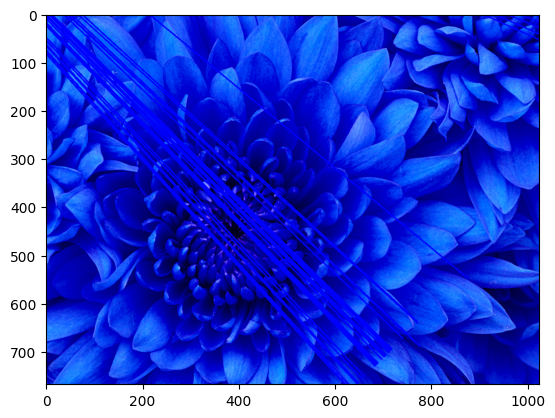

In [81]:
lines = cv.HoughLines(edged, 1, np.pi/180, 200)
n_lines = len(lines)

for i in range(n_lines):
  for rho, theta in lines[i]:
    a = np.cos(theta)
    b = np.sin (theta)
    x0 = a*rho
    y0 = b*rho
    #y=mc+c
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*a)
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*a)

    cv.line(img3, (x1,x1), (x2,y2), (0,0,255), 2)

plt.imshow(img3)

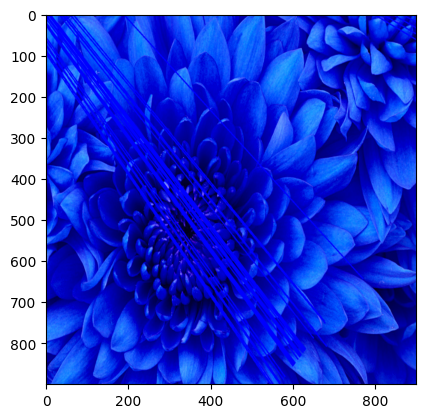

In [85]:
#image seperation

img4 = cv.resize(img3, (900,900))
plt.imshow(cv4)

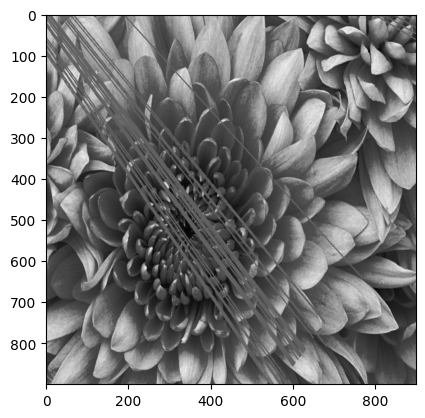

In [86]:
img3_cvt = cv.cvtColor(img4, cv.COLOR_BGR2GRAY)

plt.imshow(img3_cvt, cmap = 'gray')

(array([1.0000e+00, 2.0000e+00, 1.4000e+01, 0.0000e+00, 3.2000e+01,
        1.2300e+02, 1.5100e+02, 0.0000e+00, 1.4700e+02, 2.2500e+02,
        2.5100e+02, 0.0000e+00, 3.0500e+02, 3.8800e+02, 0.0000e+00,
        4.7600e+02, 5.7400e+02, 6.9000e+02, 0.0000e+00, 7.2300e+02,
        8.0400e+02, 9.8100e+02, 0.0000e+00, 1.0090e+03, 1.2430e+03,
        0.0000e+00, 1.3470e+03, 1.7100e+03, 1.8530e+03, 0.0000e+00,
        2.0210e+03, 2.4560e+03, 2.1670e+03, 0.0000e+00, 2.4670e+03,
        3.6240e+03, 2.5480e+03, 0.0000e+00, 3.0080e+03, 3.8020e+03,
        0.0000e+00, 3.5300e+03, 4.3140e+03, 4.9030e+03, 0.0000e+00,
        4.6960e+03, 4.7530e+03, 6.2520e+03, 0.0000e+00, 6.9120e+03,
        5.3570e+03, 0.0000e+00, 8.2470e+03, 8.1840e+03, 9.1850e+03,
        0.0000e+00, 9.7770e+03, 1.0742e+04, 7.7160e+03, 0.0000e+00,
        1.3836e+04, 1.0916e+04, 1.0479e+04, 0.0000e+00, 1.2701e+04,
        1.3482e+04, 0.0000e+00, 1.0196e+04, 1.3666e+04, 1.5042e+04,
        0.0000e+00, 1.1201e+04, 1.1382e+04, 1.17

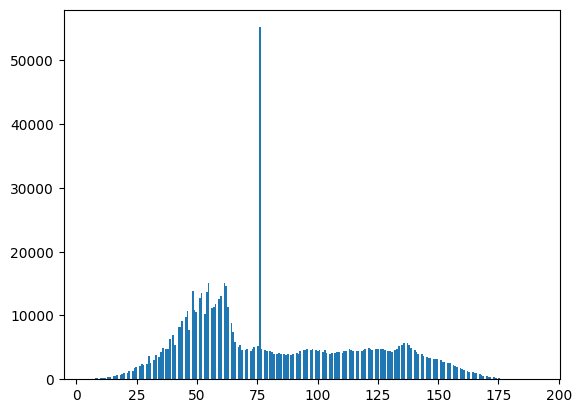

In [88]:
plt.hist(img3_cvt.ravel(), 256)

In [100]:
ret, bin_img = cv.threshold(img4, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

plt.imshow(bin_img)

error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/thresh.cpp:1633: error: (-2:Unspecified error) in function 'double cv::threshold(cv::InputArray, cv::OutputArray, double, double, int)'
> THRESH_OTSU mode:
>     'src_type == CV_8UC1 || src_type == CV_16UC1'
> where
>     'src_type' is 16 (CV_8UC3)


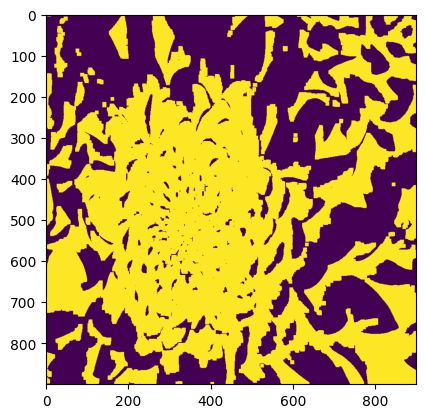

In [94]:
#NOISE REMOVAL: DENOISING

kernel = cv.getStructuringElement(cv.MORPH_RECT, (, 5))

opening = cv.morphologyEx(bin_img, cv.MORPH_OPEN, kernel, iterations=2)

plt.imshow(opening)

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))


sure_bg = cv.dilate(opening, kernel, iterations=3)

axes[0,0].imshow(sure_bg)
axes[0,0].set_title('sure_bg')
dist_transform = cv.distanceTransform(bin_img, cv.DIST_L2, 5)

plt.imshow(dist_transform)

ret, sure_fg = cv.threshold(dist_transform, 0.7*dist_transform, max(), 255, 0)

sure_fg = np.uint8(sure_fg)
axes[1,0].imshow(sure_fg)
axes[1,0].set_title('sure_fg')
unknown = cv.subtract(sure_bg, sure_fg)
axes[1,0].imshow(unknown)
axes[1,0].set_title('unknown')





In [114]:
#marker labelling

#sure foreground
ret, markers = cv.connectedComponents(sure_bg)
markers = markers + 1
# Recalculate unknown as it was not defined in the previous cell
unknown = cv.subtract(sure_bg, sure_fg)
markers[unknown==255] = 0


fig, ax = plt.subplot(figsize=(6,6))
ax.imshow(markers, cmap = 'tab20b')
ax.set_title('markers')
ax.axis('off')
plt.show()

NameError: name 'sure_fg' is not defined